# Lesson 5
## PD10 - Strings and Categorical Data

In [3]:
import numpy as np
import pandas as pd

In [4]:
pd.Series(['a','b'])

0    a
1    b
dtype: object

In [2]:
pd.Series(['a','b'], dtype="string")

0    a
1    b
dtype: string

In [6]:
s = pd.Series(['a_b_c','d_e_f','g_h_i'], dtype='string')

In [7]:
s

0    a_b_c
1    d_e_f
2    g_h_i
dtype: string

In [8]:
s.str.upper()

0    A_B_C
1    D_E_F
2    G_H_I
dtype: string

In [9]:
s.str.cat(sep=', ')

'a_b_c, d_e_f, g_h_i'

In [10]:
s.str.split('_')

0    [a, b, c]
1    [d, e, f]
2    [g, h, i]
dtype: object

In [11]:
s.str.split('_').str[1]

0    b
1    e
2    h
dtype: object

In [12]:
s.str.split('_').str[1][1]

'e'

In [13]:
s.str.split('_', expand=True)

0  1  2
0  a  b  c
1  d  e  f
2  g  h  i

In [14]:
s.str[2:]

0    b_c
1    e_f
2    h_i
dtype: string

In [16]:
s

0    a_b_c
1    d_e_f
2    g_h_i
dtype: string

In [17]:
s.str.contains('a')

0     True
1    False
2    False
dtype: boolean

In [18]:
s.str.count('a')

0    1
1    0
2    0
dtype: Int64

In [21]:
s.str.len()

0    5
1    5
2    5
dtype: Int64

In [24]:
s1 = pd.Series(['a','b','c','a'], dtype='category')

In [25]:
s1

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [27]:
df1 = pd.DataFrame({"A":['a','b','c','a']})

In [28]:
df1

A
0  a
1  b
2  c
3  a

In [30]:
df1['B'] = df1['A'].astype('category')

In [31]:
df1

A  B
0  a  a
1  b  b
2  c  c
3  a  a

In [33]:
df1.dtypes

A      object
B    category
dtype: object

In [35]:
df2 = pd.DataFrame({'value': np.random.randint(0,100,20)})

In [36]:
df2

value
0      46
1      92
2      70
3      12
4      66
5       0
6      65
7      21
8      23
9      37
10     32
11     76
12     57
13     83
14     24
15     66
16     90
17     87
18     87
19     50

In [37]:
labels = [f'{i} - {i+9}' for i in range(0,100,10)]

In [38]:
labels

['0 - 9',
 '10 - 19',
 '20 - 29',
 '30 - 39',
 '40 - 49',
 '50 - 59',
 '60 - 69',
 '70 - 79',
 '80 - 89',
 '90 - 99']

In [41]:
df2['group'] = pd.cut(df2['value'], range(0, 105, 10), right=False, labels=labels)

In [42]:
df2

value    group
0      46  40 - 49
1      92  90 - 99
2      70  70 - 79
3      12  10 - 19
4      66  60 - 69
5       0    0 - 9
6      65  60 - 69
7      21  20 - 29
8      23  20 - 29
9      37  30 - 39
10     32  30 - 39
11     76  70 - 79
12     57  50 - 59
13     83  80 - 89
14     24  20 - 29
15     66  60 - 69
16     90  90 - 99
17     87  80 - 89
18     87  80 - 89
19     50  50 - 59

In [43]:
df2['group'].value_counts()

20 - 29    3
60 - 69    3
80 - 89    3
30 - 39    2
50 - 59    2
70 - 79    2
90 - 99    2
0 - 9      1
10 - 19    1
40 - 49    1
Name: group, dtype: int64

In [44]:
raw_cat = pd.Categorical(['a','b','c','d'], categories=['b','c','d'])

In [45]:
s = pd.Series(raw_cat)

In [46]:
s

0    NaN
1      b
2      c
3      d
dtype: category
Categories (3, object): ['b', 'c', 'd']

## PD11 - Missing Data

In [47]:
df3 = pd.DataFrame(np.random.randn(3,2), index=['a','c','e'],columns=['one','two'])

In [48]:
df3

one       two
a  1.288498 -0.415244
c  1.174238 -0.071364
e  1.979510  0.122076

In [50]:
df3['three']='bar'

In [51]:
df3['four']=df3['one'] > 0

In [52]:
df3

one       two three  four
a  1.288498 -0.415244   bar  True
c  1.174238 -0.071364   bar  True
e  1.979510  0.122076   bar  True

In [53]:
df4 = df3.reindex(['a','b','c','d','e'])

In [54]:
df4

one       two three  four
a  1.288498 -0.415244   bar  True
b       NaN       NaN   NaN   NaN
c  1.174238 -0.071364   bar  True
d       NaN       NaN   NaN   NaN
e  1.979510  0.122076   bar  True

In [55]:
df4['one'].isna()

a    False
b     True
c    False
d     True
e    False
Name: one, dtype: bool

In [56]:
df4['four'].notna()

a     True
b    False
c     True
d    False
e     True
Name: four, dtype: bool

In [57]:
df3.isna()

one    two  three   four
a  False  False  False  False
c  False  False  False  False
e  False  False  False  False

In [58]:
df4.isna()

one    two  three   four
a  False  False  False  False
b   True   True   True   True
c  False  False  False  False
d   True   True   True   True
e  False  False  False  False

In [59]:
df5=df4.copy()

In [60]:
df5['timestamp'] = pd.Timestamp('2022/05/02')

In [61]:
df5.loc['c','timestamp'] = np.nan

In [62]:
df5

one       two three  four  timestamp
a  1.288498 -0.415244   bar  True 2022-05-02
b       NaN       NaN   NaN   NaN 2022-05-02
c  1.174238 -0.071364   bar  True        NaT
d       NaN       NaN   NaN   NaN 2022-05-02
e  1.979510  0.122076   bar  True 2022-05-02

In [63]:
df5.dtypes.value_counts()

float64           2
object            2
datetime64[ns]    1
dtype: int64

In [64]:
df6 = df4.copy()

In [65]:
df6

one       two three  four
a  1.288498 -0.415244   bar  True
b       NaN       NaN   NaN   NaN
c  1.174238 -0.071364   bar  True
d       NaN       NaN   NaN   NaN
e  1.979510  0.122076   bar  True

In [66]:
df6[['one','two']] = df4[['one','two']].fillna(0)

In [67]:
df6

one       two three  four
a  1.288498 -0.415244   bar  True
b  0.000000  0.000000   NaN   NaN
c  1.174238 -0.071364   bar  True
d  0.000000  0.000000   NaN   NaN
e  1.979510  0.122076   bar  True

In [68]:
df6['three'] = df6['three'].fillna('bar')

In [69]:
df6

one       two three  four
a  1.288498 -0.415244   bar  True
b  0.000000  0.000000   bar   NaN
c  1.174238 -0.071364   bar  True
d  0.000000  0.000000   bar   NaN
e  1.979510  0.122076   bar  True

In [70]:
df6['four'] = df6['four'].fillna(False)

In [71]:
df6

one       two three   four
a  1.288498 -0.415244   bar   True
b  0.000000  0.000000   bar  False
c  1.174238 -0.071364   bar   True
d  0.000000  0.000000   bar  False
e  1.979510  0.122076   bar   True

In [72]:
df6.isna()

one    two  three   four
a  False  False  False  False
b  False  False  False  False
c  False  False  False  False
d  False  False  False  False
e  False  False  False  False

## PD12 - Time Date

In [73]:
import datetime as dt

In [75]:
pd.to_datetime(['21/07/2022', np.datetime64('2021-07-23'), dt.datetime(2022,7,22)])

/tmp/ipykernel_5259/2778411205.py:1: UserWarning: Parsing '21/07/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime(['21/07/2022', np.datetime64('2021-07-23'), dt.datetime(2022,7,22)])


DatetimeIndex(['2022-07-21', '2021-07-23', '2022-07-22'], dtype='datetime64[ns]', freq=None)

In [76]:
dti =pd.date_range('2021-07-22', periods=3, freq='H')

In [77]:
dti

DatetimeIndex(['2021-07-22 00:00:00', '2021-07-22 01:00:00',
               '2021-07-22 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [78]:
dti = dti.tz_localize('UTC')

In [79]:
dti

DatetimeIndex(['2021-07-22 00:00:00+00:00', '2021-07-22 01:00:00+00:00',
               '2021-07-22 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

In [80]:
dti = dti.tz_convert('US/Pacific')

In [81]:
dti

DatetimeIndex(['2021-07-21 17:00:00-07:00', '2021-07-21 18:00:00-07:00',
               '2021-07-21 19:00:00-07:00'],
              dtype='datetime64[ns, US/Pacific]', freq='H')

In [82]:
idx = pd.date_range('2021-07-22', periods=5,freq='H')

In [83]:
idx

DatetimeIndex(['2021-07-22 00:00:00', '2021-07-22 01:00:00',
               '2021-07-22 02:00:00', '2021-07-22 03:00:00',
               '2021-07-22 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [84]:
ts = pd.Series(range(len(idx)), index=idx)

In [85]:
ts

2021-07-22 00:00:00    0
2021-07-22 01:00:00    1
2021-07-22 02:00:00    2
2021-07-22 03:00:00    3
2021-07-22 04:00:00    4
Freq: H, dtype: int64

In [86]:
ts.resample('2H').mean()

2021-07-22 00:00:00    0.5
2021-07-22 02:00:00    2.5
2021-07-22 04:00:00    4.0
Freq: 2H, dtype: float64

In [88]:
friday = pd.Timestamp('2021-12-24')

In [160]:
friday

Timestamp('2021-12-24 00:00:00')

In [161]:
friday.day_name()

'Friday'

In [91]:
saturday = friday + pd.Timedelta('1 day')

In [92]:
saturday

Timestamp('2021-12-25 00:00:00')

In [93]:
saturday.day_name()

'Saturday'

In [94]:
monday  = friday + pd.offsets.BDay()
monday.day_name()

'Monday'

In [95]:
pd.to_datetime('25-12-2022 00:00', format='%d-%m-%Y %H:%M')

Timestamp('2022-12-25 00:00:00')

In [96]:
pd.Period('2022-07')

Period('2022-07', 'M')

In [98]:
pd.Period('2022-07-12', freq='D')

Period('2022-07-12', 'D')

In [99]:
ts = pd.Timestamp('2022-06-13 16:00:00', tz='Europe/Lisbon')

In [100]:
ts

Timestamp('2022-06-13 16:00:00+0100', tz='Europe/Lisbon')

In [101]:
ts + pd.Timedelta(days = 1)

Timestamp('2022-06-14 16:00:00+0100', tz='Europe/Lisbon')

In [102]:
friday + pd.DateOffset(days=1)

Timestamp('2021-12-25 00:00:00')

In [103]:
friday

Timestamp('2021-12-24 00:00:00')

In [104]:
two_bdays = 2 * pd.offsets.BDay()

In [105]:
friday + two_bdays

Timestamp('2021-12-28 00:00:00')

In [106]:
two_bdays.apply(friday)

/home/charles/applications/miniconda3/envs/jupyter/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: FutureWarning: BusinessDay.apply is deprecated and will be removed in a future version. Use `offset + other` instead
  exec(code_obj, self.user_global_ns, self.user_ns)


Timestamp('2021-12-28 00:00:00')

## PD13 - Charts

In [107]:
import matplotlib.pyplot as plt

In [108]:
np.random.seed(123456)

In [109]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2019',periods=1000))

In [110]:
ts

2019-01-01    0.469112
2019-01-02   -0.282863
2019-01-03   -1.509059
2019-01-04   -1.135632
2019-01-05    1.212112
                ...   
2021-09-22   -1.512743
2021-09-23    0.933753
2021-09-24   -0.308013
2021-09-25   -0.079915
2021-09-26   -1.010589
Freq: D, Length: 1000, dtype: float64

In [111]:
ts = ts.cumsum()

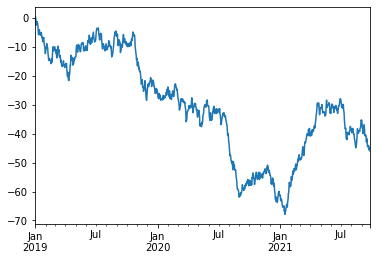

In [112]:
ts.plot();

In [113]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))

In [114]:
df = df.cumsum()

In [115]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

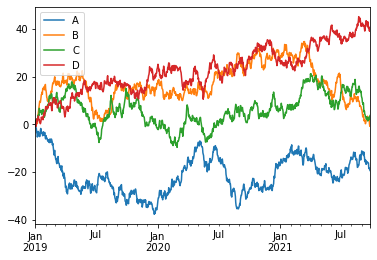

In [117]:
df.plot();

In [118]:
df = pd.DataFrame(np.random.randn(1000,2), index=ts.index, columns=list('BC')).cumsum()

In [120]:
df

B         C
2019-01-01   0.879831  0.573687
2019-01-02   0.145896  0.149091
2019-01-03   1.782761  1.397438
2019-01-04  -0.038807  2.758431
2019-01-05   0.232905  2.468640
...               ...       ...
2021-09-22 -27.673706 -3.591743
2021-09-23 -29.459943 -3.306978
2021-09-24 -27.398674 -2.735528
2021-09-25 -29.589450 -2.312671
2021-09-26 -29.733052 -3.633835

[1000 rows x 2 columns]

In [130]:
df['A'] = pd.Series(list(range(len(df))), index=ts.index)

In [131]:
df

B         C    A
2019-01-01   0.879831  0.573687    0
2019-01-02   0.145896  0.149091    1
2019-01-03   1.782761  1.397438    2
2019-01-04  -0.038807  2.758431    3
2019-01-05   0.232905  2.468640    4
...               ...       ...  ...
2021-09-22 -27.673706 -3.591743  995
2021-09-23 -29.459943 -3.306978  996
2021-09-24 -27.398674 -2.735528  997
2021-09-25 -29.589450 -2.312671  998
2021-09-26 -29.733052 -3.633835  999

[1000 rows x 3 columns]

<AxesSubplot:>

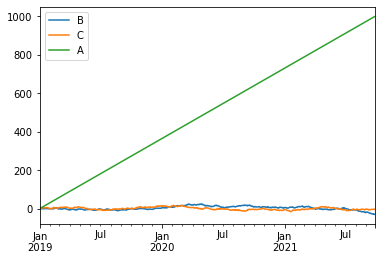

In [132]:
df.plot()

<AxesSubplot:xlabel='A'>

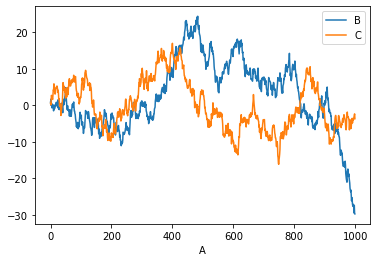

In [134]:
df.plot(x='A', y=['B','C'])

<AxesSubplot:>

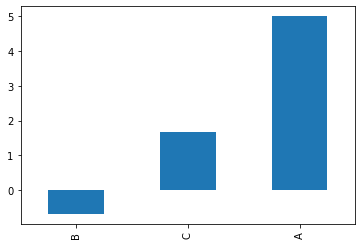

In [135]:
df.iloc[5].plot.bar()

In [139]:
df12 = pd.DataFrame(np.random.rand(10,4), columns=list('abcd'))

In [140]:
df12

a         b         c         d
0  0.776756  0.303773  0.428600  0.070400
1  0.249213  0.973558  0.404596  0.777473
2  0.644560  0.022563  0.444410  0.804606
3  0.628325  0.398168  0.082784  0.099393
4  0.401857  0.090636  0.886385  0.424656
5  0.622205  0.739249  0.041461  0.933507
6  0.231107  0.292615  0.883645  0.695019
7  0.608669  0.280347  0.484302  0.625539
8  0.568170  0.254995  0.621211  0.385128
9  0.506793  0.926615  0.970202  0.308848

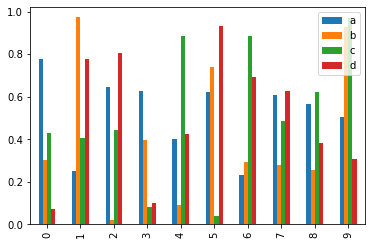

In [141]:
df12.plot.bar();

<AxesSubplot:>

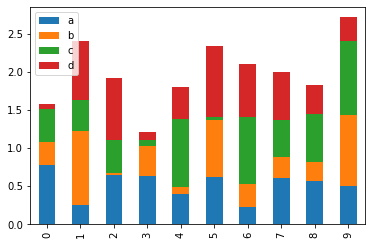

In [142]:
df12.plot.bar(stacked=True)

<AxesSubplot:>

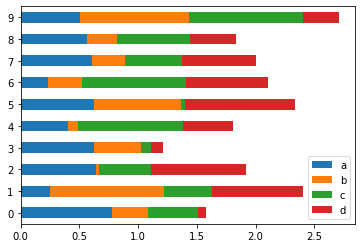

In [143]:
df12.plot.barh(stacked=True)

<AxesSubplot:ylabel='Frequency'>

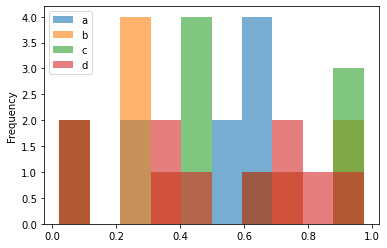

In [146]:
df12.plot.hist(alpha=0.6)

<AxesSubplot:>

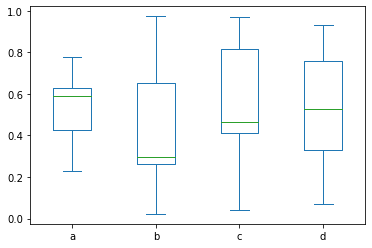

In [147]:
df12.plot.box()

<AxesSubplot:>

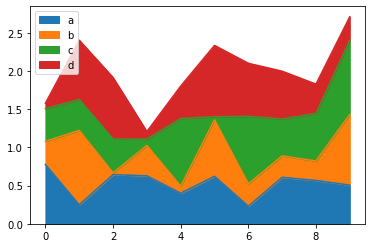

In [148]:
df12.plot.area()

<AxesSubplot:xlabel='a', ylabel='b'>

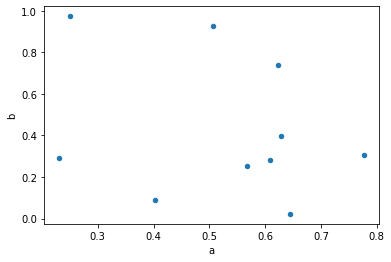

In [150]:
df12.plot.scatter(x='a',y='b')

<AxesSubplot:xlabel='a', ylabel='b'>

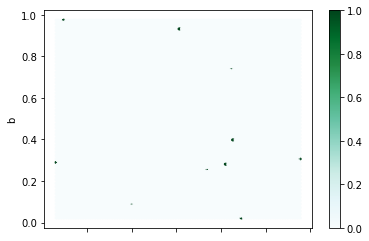

In [151]:
df12.plot.hexbin(x='a',y='b')

<AxesSubplot:ylabel='Density'>

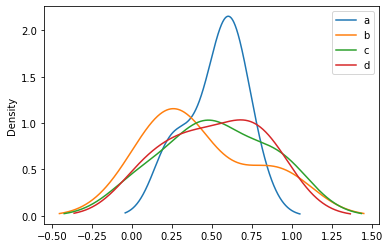

In [155]:
import scipy
df12.plot.kde()

## Quiz Lesson PD10-13

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
df_gym2_q1 = pd.read_csv('gym2_q1.csv', sep=';',index_col = 'id', parse_dates = ['date'])
df_gym2_q1a = pd.read_csv('gym2_q1a.csv', sep=';', index_col = 'id', parse_dates = ['date'])
df_gym2_q1_nan = pd.read_csv('gym2_q1_nan.csv', sep=';', index_col = 'id', parse_dates = ['date'])
df_gym_q1 = pd.read_csv('gym_q1.csv', sep=';', index_col = 'id', parse_dates = ['date'])

/home/charles/applications/miniconda3/envs/jupyter/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '28/08/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/home/charles/applications/miniconda3/envs/jupyter/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '21/10/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/home/charles/applications/miniconda3/envs/jupyter/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16/11/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/home/charles/applications/miniconda3/envs/jupyter/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '22/08/2009' in DD/M

In [164]:
df_gym2_q1.head(3)

id            name        date  height  weight  age  hours   status  \
0  1373913  Marisa Martins  05/02/2013     155      48   45      3  married   
1  1109818    Rita Fonseca  28/08/2018     166      54   45      3  married   
2  1158813   Joana Freitas  21/10/2013     150      42   52      3    widow   

   children sex            class        city  years  rank  
0         2   F            cycle       Porto      9  good  
1         3   F  hydrogymnastics  Matosinhos      3  fair  
2         1   F            zumba       Porto      8  good

In [165]:
df_gym2_q1.describe()

id      height     weight        age      hours   children  \
count  6.000000e+01   60.000000   60.00000  60.000000  60.000000  60.000000   
mean   1.461868e+06  163.533333   59.95000  40.083333   3.600000   1.483333   
std    2.932733e+05    9.307308   13.55144  10.469150   1.719282   1.214205   
min    1.055806e+06  150.000000   42.00000  23.000000   1.000000   0.000000   
25%    1.203768e+06  154.000000   50.00000  32.000000   2.000000   0.000000   
50%    1.392810e+06  163.500000   56.00000  40.000000   3.000000   1.500000   
75%    1.707040e+06  171.000000   65.25000  46.250000   5.000000   2.000000   
max    1.998809e+06  179.000000  102.00000  59.000000   8.000000   5.000000   

           years  
count  60.000000  
mean    9.516667  
std     5.984420  
min     0.000000  
25%     5.000000  
50%     8.500000  
75%    14.250000  
max    21.000000

In [166]:
df_gym2_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        60 non-null     int64 
 1   name      60 non-null     object
 2   date      60 non-null     object
 3   height    60 non-null     int64 
 4   weight    60 non-null     int64 
 5   age       60 non-null     int64 
 6   hours     60 non-null     int64 
 7   status    60 non-null     object
 8   children  60 non-null     int64 
 9   sex       60 non-null     object
 10  class     60 non-null     object
 11  city      60 non-null     object
 12  years     60 non-null     int64 
 13  rank      60 non-null     object
dtypes: int64(7), object(7)
memory usage: 6.7+ KB


In [167]:
df_gym2_q1a.head(3)

id            name        date  height  weight  age  hours   status  \
0  1373913  Marisa Martins  05/02/2013     155      48   45      3  married   
1  1109818    Rita Fonseca  28/08/2018     166      54   45      3  married   
2  1158813   Joana Freitas  21/10/2013     150      42   52      3    widow   

   children sex            class        city  years  
0         2   F            cycle       Porto      9  
1         3   F  hydrogymnastics  Matosinhos      3  
2         1   F            zumba       Porto      8

In [168]:
df_gym2_q1a.describe()

id      height     weight        age      hours   children  \
count  6.000000e+01   60.000000   60.00000  60.000000  60.000000  60.000000   
mean   1.461868e+06  163.533333   59.95000  40.083333   3.600000   1.483333   
std    2.932733e+05    9.307308   13.55144  10.469150   1.719282   1.214205   
min    1.055806e+06  150.000000   42.00000  23.000000   1.000000   0.000000   
25%    1.203768e+06  154.000000   50.00000  32.000000   2.000000   0.000000   
50%    1.392810e+06  163.500000   56.00000  40.000000   3.000000   1.500000   
75%    1.707040e+06  171.000000   65.25000  46.250000   5.000000   2.000000   
max    1.998809e+06  179.000000  102.00000  59.000000   8.000000   5.000000   

           years  
count  60.000000  
mean    9.516667  
std     5.984420  
min     0.000000  
25%     5.000000  
50%     8.500000  
75%    14.250000  
max    21.000000

In [169]:
df_gym2_q1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        60 non-null     int64 
 1   name      60 non-null     object
 2   date      60 non-null     object
 3   height    60 non-null     int64 
 4   weight    60 non-null     int64 
 5   age       60 non-null     int64 
 6   hours     60 non-null     int64 
 7   status    60 non-null     object
 8   children  60 non-null     int64 
 9   sex       60 non-null     object
 10  class     60 non-null     object
 11  city      60 non-null     object
 12  years     60 non-null     int64 
dtypes: int64(7), object(6)
memory usage: 6.2+ KB


In [171]:
df_gym2_q1_nan.head()

id               name        date  height  weight   age  hours  \
0  1373913     Marisa Martins  05/02/2013   155.0    48.0  45.0    3.0   
1  1109818       Rita Fonseca  28/08/2018   166.0    54.0  45.0    3.0   
2  1158813      Joana Freitas  21/10/2013   150.0    42.0  52.0    3.0   
3  1566515    Joana Goncalves  16/11/2015   161.0    49.0  59.0    2.0   
4  1974509  Francisco Fonseca  22/08/2009   162.0    52.0  43.0    2.0   

    status  children sex            class        city  years       rank  
0  married       2.0   F            cycle       Porto    9.0       good  
1  married       3.0   F  hydrogymnastics  Matosinhos    3.0       fair  
2    widow       1.0   F            zumba       Porto    8.0       good  
3  married       2.0   F            cycle       Porto    6.0       good  
4  married       1.0   M         swimming       Porto   12.0  very_good

In [172]:
df_gym2_q1_nan.describe()

height     weight        age      hours   children      years
count   60.000000   60.00000  60.000000  60.000000  60.000000  60.000000
mean   163.533333   59.95000  40.083333   3.600000   1.483333   9.516667
std      9.307308   13.55144  10.469150   1.719282   1.214205   5.984420
min    150.000000   42.00000  23.000000   1.000000   0.000000   0.000000
25%    154.000000   50.00000  32.000000   2.000000   0.000000   5.000000
50%    163.500000   56.00000  40.000000   3.000000   1.500000   8.500000
75%    171.000000   65.25000  46.250000   5.000000   2.000000  14.250000
max    179.000000  102.00000  59.000000   8.000000   5.000000  21.000000

In [173]:
df_gym2_q1_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        61 non-null     object 
 1   name      60 non-null     object 
 2   date      60 non-null     object 
 3   height    60 non-null     float64
 4   weight    60 non-null     float64
 5   age       60 non-null     float64
 6   hours     60 non-null     float64
 7   status    60 non-null     object 
 8   children  60 non-null     float64
 9   sex       60 non-null     object 
 10  class     60 non-null     object 
 11  city      59 non-null     object 
 12  years     60 non-null     float64
 13  rank      60 non-null     object 
dtypes: float64(6), object(8)
memory usage: 6.9+ KB


In [186]:
df_gym2_q1_nan.loc[(df_gym2_q1_nan.isna().loc[:, 'rank'] == True)]

id name date  height  weight  age  hours status  children  sex class  \
26  NaN  NaN  NaN     NaN     NaN  NaN    NaN    NaN       NaN  NaN   NaN   
37    \  NaN  NaN     NaN     NaN  NaN    NaN    NaN       NaN  NaN   NaN   

   city  years rank  
26  NaN    NaN  NaN  
37  NaN    NaN  NaN

In [187]:
df_gym_q1.head(3)

id            name        date  height  weight  age  hours   status  \
0  1373913  Marisa Martins  02/05/2013     155      48   45      3  married   
1  1109818    Rita Fonseca  28/08/2018     166      54   45      3  married   
2  1158813   Joana Freitas  21/10/2013     150      42   52      3    widow   

   children sex  
0         2   F  
1         3   F  
2         1   F

In [188]:
df_gym_q1.describe()

id      height     weight        age      hours   children
count  6.000000e+01   60.000000   60.00000  60.000000  60.000000  60.000000
mean   1.461868e+06  163.533333   59.95000  40.083333   3.600000   1.483333
std    2.932733e+05    9.307308   13.55144  10.469150   1.719282   1.214205
min    1.055806e+06  150.000000   42.00000  23.000000   1.000000   0.000000
25%    1.203768e+06  154.000000   50.00000  32.000000   2.000000   0.000000
50%    1.392810e+06  163.500000   56.00000  40.000000   3.000000   1.500000
75%    1.707040e+06  171.000000   65.25000  46.250000   5.000000   2.000000
max    1.998809e+06  179.000000  102.00000  59.000000   8.000000   5.000000

In [189]:
df_gym_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        60 non-null     int64 
 1   name      60 non-null     object
 2   date      60 non-null     object
 3   height    60 non-null     int64 
 4   weight    60 non-null     int64 
 5   age       60 non-null     int64 
 6   hours     60 non-null     int64 
 7   status    60 non-null     object
 8   children  60 non-null     int64 
 9   sex       60 non-null     object
dtypes: int64(6), object(4)
memory usage: 4.8+ KB


In [190]:
df_gym2_q1.head(3)

id            name        date  height  weight  age  hours   status  \
0  1373913  Marisa Martins  05/02/2013     155      48   45      3  married   
1  1109818    Rita Fonseca  28/08/2018     166      54   45      3  married   
2  1158813   Joana Freitas  21/10/2013     150      42   52      3    widow   

   children sex            class        city  years  rank  
0         2   F            cycle       Porto      9  good  
1         3   F  hydrogymnastics  Matosinhos      3  fair  
2         1   F            zumba       Porto      8  good

In [198]:
# Quiz .1
#   Given the dataframe df and using the Pandas library create a function
#   'solve()' to answer the following:
#     Convert the city name to uppercase. Print the dataframe first three rows.

df_gym2_q1_upper = df_gym2_q1.copy()
df_gym2_q1_upper['city'] = df_gym2_q1['city'].str.upper()
df_gym2_q1_upper.set_index('id', inplace=True)
print(df_gym2_q1_upper.head(3))

                   name        date  height  weight  age  hours   status  \
id                                                                         
1373913  Marisa Martins  05/02/2013     155      48   45      3  married   
1109818    Rita Fonseca  28/08/2018     166      54   45      3  married   
1158813   Joana Freitas  21/10/2013     150      42   52      3    widow   

         children sex            class        city  years  rank  
id                                                               
1373913         2   F            cycle       PORTO      9  good  
1109818         3   F  hydrogymnastics  MATOSINHOS      3  fair  
1158813         1   F            zumba       PORTO      8  good  


In [199]:
def solve():
    df_upper = df.copy()
    df_upper['city'] = df['city'].str.upper()
    df_upper.set_index('id', inplace=True)
    print(df_upper.head(3))

In [200]:
# Quiz .2
#   Given the dataframe df and using the Pandas library create a function
#   'solve()' to answer the following:
#     Calculate and print the number of registrations per year (sorted in
#     ascending order of the year).
df = df_gym2_q1
df

id                name        date  height  weight  age  hours  \
0   1373913      Marisa Martins  05/02/2013     155      48   45      3   
1   1109818        Rita Fonseca  28/08/2018     166      54   45      3   
2   1158813       Joana Freitas  21/10/2013     150      42   52      3   
3   1566515     Joana Goncalves  16/11/2015     161      49   59      2   
4   1974509   Francisco Fonseca  22/08/2009     162      52   43      2   
5   1767703      Manuel Martins  25/01/2003     179      85   24      6   
6   1071208    Florbela Freitas  26/09/2008     166      53   28      5   
7   1930916           Rita Cruz  11/10/2016     168      52   56      3   
8   1811504     Antonio Pereira  16/02/2004     154      61   51      2   
9   1235914     Manuel Carvalho  27/08/2014     158      45   38      3   
10  1417018      Manuel Marinho  20/06/2018     173      57   40      3   
11  1642316        Joao Freitas  23/10/2016     165      50   54      3   
12  1170413    Susana Goncalves  03/07/2013     157      65   40      2   
13  1560118   Francisco Freitas  15/07/2018     152      53   41      3   
14  1410714   Francisco Martins  25/11/2014     153      58   24      7   
15  1436908      Susana Madeira  05/09/2008     160      49   56      2   
16  1294215     Francisco Pinho  25/08/2015     154      58   23      6   
17  1286112        Joao Madeira  19/08/2012     152      78   29      6   
18  1315817        Manuel Pinho  23/12/2017     179      58   29      5   
19  1055806  Catarina Goncalves  21/09/2006     168      53   59      2   
20  1305314    Florbela Marinho  24/04/2014     154      62   36      4   
21  1953503   Francisco Pereira  04/03/2003     170      79   49      2   
22  1204821        Rita Madeira  06/11/2021     151      45   44      2   
23  1998809  Florbela Goncalves  01/07/2009     169      50   39      4   
24  1105321    Catarina Freitas  07/10/2021     166      70   40      4   
25  1867513     Antonio Fonseca  06/07/2013     164      53   41      3   
26  1967921       Catarina Cruz  13/10/2021     176      61   30      5   
27  1068508           Jose Cruz  02/12/2008     177      90   27      6   
28  1152520          Joao Pinho  29/11/2020     154      66   55      1   
29  1373707      Manuel Fonseca  24/09/2007     175     102   40      3   
30  1776804     Pedro Goncalves  03/09/2004     156      46   32      5   
31  1147413       Joana Pereira  24/03/2013     162      49   34      5   
32  1466415       Joana Marinho  26/11/2015     164      51   57      1   
33  1610119       Pedro Madeira  19/05/2019     163      53   28      5   
34  1710710         Manuel Cruz  27/11/2010     178      55   44      3   
35  1564109       Sonia Marinho  11/06/2009     156      46   41      2   
36  1223600         Marisa Cruz  16/10/2000     171      61   42      4   
37  1705816    Florbela Pereira  08/12/2016     171      58   32      6   
38  1692512   Francisco Madeira  24/09/2012     154      49   23      8   
39  1177213    Catarina Pereira  13/10/2013     175      88   54      1   
40  1337319         Sonia Pinho  02/11/2019     177      63   34      5   
41  1871004       Jose Carvalho  17/09/2004     153      67   26      7   
42  1098118      Manuel Madeira  30/06/2018     165      55   34      4   
43  1058304   Catarina Carvalho  25/09/2004     150      45   59      2   
44  1653302  Francisco Carvalho  09/05/2002     150      66   23      7   
45  1320306       Sonia Fonseca  09/12/2006     152      46   37      4   
46  1200611    Catarina Madeira  24/10/2011     154      63   46      2   
47  1758412      Joana Carvalho  08/09/2012     174      59   37      3   
48  1471416     Sonia Goncalves  05/07/2016     170      52   43      3   
49  1374905       Sonia Pereira  17/10/2005     178      94   37      3   
50  1221721          Pedro Cruz  08/11/2021     161      50   43      3   
51  1359417        Jose Fonseca  28/10/2017     155      68   41      3   
52  1331601    Catarina Marinho  1

In [204]:
df['date'].iloc[1]

'28/08/2018'

In [212]:
df['year'] = pd.to_datetime(list(df['date'])).year
#

/tmp/ipykernel_5259/4091531441.py:1: UserWarning: Parsing '28/08/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['year'] = pd.to_datetime(list(df['date'])).year
/tmp/ipykernel_5259/4091531441.py:1: UserWarning: Parsing '21/10/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['year'] = pd.to_datetime(list(df['date'])).year
/tmp/ipykernel_5259/4091531441.py:1: UserWarning: Parsing '16/11/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['year'] = pd.to_datetime(list(df['date'])).year
/tmp/ipykernel_5259/4091531441.py:1: UserWarning: Parsing '22/08/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['year'] = pd.to_datetime(list(df['date'])).year
/tmp/ipykernel_5259/4091531441.py:1: UserWarning: Parsing '25/01/2003' in DD/MM/YYYY format. Provide format 

In [213]:
df

id                name        date  height  weight  age  hours  \
0   1373913      Marisa Martins  05/02/2013     155      48   45      3   
1   1109818        Rita Fonseca  28/08/2018     166      54   45      3   
2   1158813       Joana Freitas  21/10/2013     150      42   52      3   
3   1566515     Joana Goncalves  16/11/2015     161      49   59      2   
4   1974509   Francisco Fonseca  22/08/2009     162      52   43      2   
5   1767703      Manuel Martins  25/01/2003     179      85   24      6   
6   1071208    Florbela Freitas  26/09/2008     166      53   28      5   
7   1930916           Rita Cruz  11/10/2016     168      52   56      3   
8   1811504     Antonio Pereira  16/02/2004     154      61   51      2   
9   1235914     Manuel Carvalho  27/08/2014     158      45   38      3   
10  1417018      Manuel Marinho  20/06/2018     173      57   40      3   
11  1642316        Joao Freitas  23/10/2016     165      50   54      3   
12  1170413    Susana Goncalves  03/07/2013     157      65   40      2   
13  1560118   Francisco Freitas  15/07/2018     152      53   41      3   
14  1410714   Francisco Martins  25/11/2014     153      58   24      7   
15  1436908      Susana Madeira  05/09/2008     160      49   56      2   
16  1294215     Francisco Pinho  25/08/2015     154      58   23      6   
17  1286112        Joao Madeira  19/08/2012     152      78   29      6   
18  1315817        Manuel Pinho  23/12/2017     179      58   29      5   
19  1055806  Catarina Goncalves  21/09/2006     168      53   59      2   
20  1305314    Florbela Marinho  24/04/2014     154      62   36      4   
21  1953503   Francisco Pereira  04/03/2003     170      79   49      2   
22  1204821        Rita Madeira  06/11/2021     151      45   44      2   
23  1998809  Florbela Goncalves  01/07/2009     169      50   39      4   
24  1105321    Catarina Freitas  07/10/2021     166      70   40      4   
25  1867513     Antonio Fonseca  06/07/2013     164      53   41      3   
26  1967921       Catarina Cruz  13/10/2021     176      61   30      5   
27  1068508           Jose Cruz  02/12/2008     177      90   27      6   
28  1152520          Joao Pinho  29/11/2020     154      66   55      1   
29  1373707      Manuel Fonseca  24/09/2007     175     102   40      3   
30  1776804     Pedro Goncalves  03/09/2004     156      46   32      5   
31  1147413       Joana Pereira  24/03/2013     162      49   34      5   
32  1466415       Joana Marinho  26/11/2015     164      51   57      1   
33  1610119       Pedro Madeira  19/05/2019     163      53   28      5   
34  1710710         Manuel Cruz  27/11/2010     178      55   44      3   
35  1564109       Sonia Marinho  11/06/2009     156      46   41      2   
36  1223600         Marisa Cruz  16/10/2000     171      61   42      4   
37  1705816    Florbela Pereira  08/12/2016     171      58   32      6   
38  1692512   Francisco Madeira  24/09/2012     154      49   23      8   
39  1177213    Catarina Pereira  13/10/2013     175      88   54      1   
40  1337319         Sonia Pinho  02/11/2019     177      63   34      5   
41  1871004       Jose Carvalho  17/09/2004     153      67   26      7   
42  1098118      Manuel Madeira  30/06/2018     165      55   34      4   
43  1058304   Catarina Carvalho  25/09/2004     150      45   59      2   
44  1653302  Francisco Carvalho  09/05/2002     150      66   23      7   
45  1320306       Sonia Fonseca  09/12/2006     152      46   37      4   
46  1200611    Catarina Madeira  24/10/2011     154      63   46      2   
47  1758412      Joana Carvalho  08/09/2012     174      59   37      3   
48  1471416     Sonia Goncalves  05/07/2016     170      52   43      3   
49  1374905       Sonia Pereira  17/10/2005     178      94   37      3   
50  1221721          Pedro Cruz  08/11/2021     161      50   43      3   
51  1359417        Jose Fonseca  28/10/2017     155      68   41      3   
52  1331601    Catarina Marinho  1

In [217]:
df.groupby('year')['id'].count()

year
2000    1
2001    2
2002    1
2003    2
2004    5
2005    1
2006    3
2007    1
2008    4
2009    3
2010    1
2011    1
2012    4
2013    6
2014    4
2015    4
2016    4
2017    2
2018    4
2019    2
2020    1
2021    4
Name: id, dtype: int64

In [218]:
def solve():
    df['year'] = pd.to_datetime(list(df['date'])).year
    df.groupby('year')['id'].count()

In [233]:
a = pd.Series(df.groupby('year')['name'].count())
a.index.name = None
a

2000    1
2001    2
2002    1
2003    2
2004    5
2005    1
2006    3
2007    1
2008    4
2009    3
2010    1
2011    1
2012    4
2013    6
2014    4
2015    4
2016    4
2017    2
2018    4
2019    2
2020    1
2021    4
Name: name, dtype: int64

In [225]:
for value in serie1:
    print( value)

1
2
1
2
5
1
3
1
4
3
1
1
4
6
4
4
4
2
4
2
1
4


In [234]:
a = pd.Series(df.groupby('year')['name'].count())

In [235]:
a

year
2000    1
2001    2
2002    1
2003    2
2004    5
2005    1
2006    3
2007    1
2008    4
2009    3
2010    1
2011    1
2012    4
2013    6
2014    4
2015    4
2016    4
2017    2
2018    4
2019    2
2020    1
2021    4
Name: name, dtype: int64

In [236]:
a.index.dtype

dtype('int64')

In [237]:
a.name


'name'

In [238]:
def solve():
    df['year'] = pd.to_datetime(list(df['date'])).year
    a = pd.Series(df.groupby('year')['name'].count())
    a.index.name = None
    a.name = 'date'
    print(a)

In [239]:
# quiz .4
#  Given the dataframe df and using the Pandas library create a function
#  'solve()' to answer the following:
#    Delete the rows with NaN values in all the columns. Print the (number
#    rows, number of cols) before and after.
df = df_gym2_q1_nan

In [241]:
df.shape

(62, 14)

In [243]:
def solve():
    print(df.shape)
    df.dropna(how='all', inplace=True)
    print(df.shape)

In [244]:
solve()

(62, 14)
(61, 14)


In [245]:
# Quiz .5
#   Given the dataframe df and using the Pandas library create a function
#   'solve()' to answer the following:
#     Create a new column 'rank' with the following customer classification.
#     Number of years at the gym between:
#       [0, 5[ - fair
#       [5, 10[ - good
#       [10, 15[ - very_good
#       [15, [ - excellent

Print the first 5 rows from df.
df = df_gym2_q1a

In [246]:
labels = ['fair', 'good', 'very_good', 'excellent']
df['rank'] = pd.cut(df['years'], range(0, 25, 5), right=False, labels=labels)
df

id                name        date  height  weight  age  hours  \
0   1373913      Marisa Martins  05/02/2013     155      48   45      3   
1   1109818        Rita Fonseca  28/08/2018     166      54   45      3   
2   1158813       Joana Freitas  21/10/2013     150      42   52      3   
3   1566515     Joana Goncalves  16/11/2015     161      49   59      2   
4   1974509   Francisco Fonseca  22/08/2009     162      52   43      2   
5   1767703      Manuel Martins  25/01/2003     179      85   24      6   
6   1071208    Florbela Freitas  26/09/2008     166      53   28      5   
7   1930916           Rita Cruz  11/10/2016     168      52   56      3   
8   1811504     Antonio Pereira  16/02/2004     154      61   51      2   
9   1235914     Manuel Carvalho  27/08/2014     158      45   38      3   
10  1417018      Manuel Marinho  20/06/2018     173      57   40      3   
11  1642316        Joao Freitas  23/10/2016     165      50   54      3   
12  1170413    Susana Goncalves  03/07/2013     157      65   40      2   
13  1560118   Francisco Freitas  15/07/2018     152      53   41      3   
14  1410714   Francisco Martins  25/11/2014     153      58   24      7   
15  1436908      Susana Madeira  05/09/2008     160      49   56      2   
16  1294215     Francisco Pinho  25/08/2015     154      58   23      6   
17  1286112        Joao Madeira  19/08/2012     152      78   29      6   
18  1315817        Manuel Pinho  23/12/2017     179      58   29      5   
19  1055806  Catarina Goncalves  21/09/2006     168      53   59      2   
20  1305314    Florbela Marinho  24/04/2014     154      62   36      4   
21  1953503   Francisco Pereira  04/03/2003     170      79   49      2   
22  1204821        Rita Madeira  06/11/2021     151      45   44      2   
23  1998809  Florbela Goncalves  01/07/2009     169      50   39      4   
24  1105321    Catarina Freitas  07/10/2021     166      70   40      4   
25  1867513     Antonio Fonseca  06/07/2013     164      53   41      3   
26  1967921       Catarina Cruz  13/10/2021     176      61   30      5   
27  1068508           Jose Cruz  02/12/2008     177      90   27      6   
28  1152520          Joao Pinho  29/11/2020     154      66   55      1   
29  1373707      Manuel Fonseca  24/09/2007     175     102   40      3   
30  1776804     Pedro Goncalves  03/09/2004     156      46   32      5   
31  1147413       Joana Pereira  24/03/2013     162      49   34      5   
32  1466415       Joana Marinho  26/11/2015     164      51   57      1   
33  1610119       Pedro Madeira  19/05/2019     163      53   28      5   
34  1710710         Manuel Cruz  27/11/2010     178      55   44      3   
35  1564109       Sonia Marinho  11/06/2009     156      46   41      2   
36  1223600         Marisa Cruz  16/10/2000     171      61   42      4   
37  1705816    Florbela Pereira  08/12/2016     171      58   32      6   
38  1692512   Francisco Madeira  24/09/2012     154      49   23      8   
39  1177213    Catarina Pereira  13/10/2013     175      88   54      1   
40  1337319         Sonia Pinho  02/11/2019     177      63   34      5   
41  1871004       Jose Carvalho  17/09/2004     153      67   26      7   
42  1098118      Manuel Madeira  30/06/2018     165      55   34      4   
43  1058304   Catarina Carvalho  25/09/2004     150      45   59      2   
44  1653302  Francisco Carvalho  09/05/2002     150      66   23      7   
45  1320306       Sonia Fonseca  09/12/2006     152      46   37      4   
46  1200611    Catarina Madeira  24/10/2011     154      63   46      2   
47  1758412      Joana Carvalho  08/09/2012     174      59   37      3   
48  1471416     Sonia Goncalves  05/07/2016     170      52   43      3   
49  1374905       Sonia Pereira  17/10/2005     178      94   37      3   
50  1221721          Pedro Cruz  08/11/2021     161      50   43      3   
51  1359417        Jose Fonseca  28/10/2017     155      68   41      3   
52  1331601    Catarina Marinho  1

In [248]:
# Quiz .3
#   Given the dataframe df and using the Pandas library create a function
#   'solve(name)' to answer the following:
#     Given the customer name (name) calculate and print the number of days
#     from registration to 1/1/2022.
df = df_gym2_q1;

In [249]:
df

name       date  height  weight  age  hours    status  \
id                                                                             
1373913      Marisa Martins 2013-05-02     155      48   45      3   married   
1109818        Rita Fonseca 2018-08-28     166      54   45      3   married   
1158813       Joana Freitas 2013-10-21     150      42   52      3     widow   
1566515     Joana Goncalves 2015-11-16     161      49   59      2   married   
1974509   Francisco Fonseca 2009-08-22     162      52   43      2   married   
1767703      Manuel Martins 2003-01-25     179      85   24      6    single   
1071208    Florbela Freitas 2008-09-26     166      53   28      5    single   
1930916           Rita Cruz 2016-11-10     168      52   56      3   married   
1811504     Antonio Pereira 2004-02-16     154      61   51      2   married   
1235914     Manuel Carvalho 2014-08-27     158      45   38      3   married   
1417018      Manuel Marinho 2018-06-20     173      57   40      3  divorced   
1642316        Joao Freitas 2016-10-23     165      50   54      3   married   
1170413    Susana Goncalves 2013-03-07     157      65   40      2   married   
1560118   Francisco Freitas 2018-07-15     152      53   41      3   married   
1410714   Francisco Martins 2014-11-25     153      58   24      7    single   
1436908      Susana Madeira 2008-05-09     160      49   56      2  divorced   
1294215     Francisco Pinho 2015-08-25     154      58   23      6    single   
1286112        Joao Madeira 2012-08-19     152      78   29      6    single   
1315817        Manuel Pinho 2017-12-23     179      58   29      5    single   
1055806  Catarina Goncalves 2006-09-21     168      53   59      2     widow   
1305314    Florbela Marinho 2014-04-24     154      62   36      4   married   
1953503   Francisco Pereira 2003-04-03     170      79   49      2   married   
1204821        Rita Madeira 2021-06-11     151      45   44      2   married   
1998809  Florbela Goncalves 2009-01-07     169      50   39      4    single   
1105321    Catarina Freitas 2021-07-10     166      70   40      4    single   
1867513     Antonio Fonseca 2013-06-07     164      53   41      3   married   
1967921       Catarina Cruz 2021-10-13     176      61   30      5    single   
1068508           Jose Cruz 2008-02-12     177      90   27      6   married   
1152520          Joao Pinho 2020-11-29     154      66   55      1    single   
1373707      Manuel Fonseca 2007-09-24     175     102   40      3   married   
1776804     Pedro Goncalves 2004-03-09     156      46   32      5    single   
1147413       Joana Pereira 2013-03-24     162      49   34      5   married   
1466415       Joana Marinho 2015-11-26     164      51   57      1   married   
1610119       Pedro Madeira 2019-05-19     163      53   28      5   married   
1710710         Manuel Cruz 2010-11-27     178      55   44      3   married   
1564109       Sonia Marinho 2009-11-06     156      46   41      2   married   
1223600         Marisa Cruz 2000-10-16     171      61   42      4   married   
1705816    Florbela Pereira 2016-08-12     171      58   32      6   married   
1692512   Francisco Madeira 2012-09-24     154      49   23      8    single   
1177213    Catarina Pereira 2013-10-13     175      88   54      1   married   
1337319         Sonia Pinho 2019-02-11     177      63   34      5    single   
1871004       Jose Carvalho 2004-09-17     153      67   26      7   married   
1098118      Manuel Madeira 2018-06-30     165      55   34      4   married   
1058304   Catarina Carvalho 2004-09-25     150      45   59      2   married   
1653302  Francisco Carvalho 2002-09-05     150      66   23      7    single   
1320306       Sonia Fonseca 2006-09-12     152      46   37      4   married   
1200611    Catarina Madeira 2011-10-24     154      63   46      2    single   
1758412      Joana Carvalho 2012-08-09     174      59   37      3   married   
1471416     Sonia Gonca

In [265]:
name = 'Marisa Martins'
record = df.loc[df['name'] == name]
record

name       date  height  weight  age  hours   status  \
id                                                                        
1373913  Marisa Martins 2013-05-02     155      48   45      3  married   

         children sex  class   city  years  rank  
id                                                
1373913         2   F  cycle  Porto      9  good

In [276]:
past = pd.to_datetime('2022/01/01') - record['date']

In [277]:
past_days = 0
for i in past:
    pst_days = i

In [270]:
day = pd.to_datetime('2022/01/01')


In [272]:
day.date()

datetime.date(2022, 1, 1)

In [279]:
pst_days.days

3166

In [284]:
def solve(name):
    record = df.loc[df['name'] == name]
    past = pd.to_datetime('2022/01/01') - record['date']
    print(f'{past.iloc[0].days} days')

In [285]:
solve('Marisa Martins')

3166 days


### Second try

In [286]:
df_gym2_q1 = pd.read_csv('gym2_q1.csv', sep=';',index_col = 'id', parse_dates = ['date'])
df_gym2_q1a = pd.read_csv('gym2_q1a.csv', sep=';', index_col = 'id', parse_dates = ['date'])
df_gym2_q1_nan = pd.read_csv('gym2_q1_nan.csv', sep=';', index_col = 'id', parse_dates = ['date'])
df_gym_q1 = pd.read_csv('gym_q1.csv', sep=';', index_col = 'id', parse_dates = ['date'])

/home/charles/applications/miniconda3/envs/jupyter/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '28/08/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/home/charles/applications/miniconda3/envs/jupyter/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '21/10/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/home/charles/applications/miniconda3/envs/jupyter/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16/11/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/home/charles/applications/miniconda3/envs/jupyter/lib/python3.10/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '22/08/2009' in DD/M

In [287]:
# Quiz .1
#   Given the dataframe df and using the Pandas library create a function
#   'solve()' to answer the following:
#     Calculate and print the mean of the 'age' and fill the NaN values with
#     zero and calculate and print the mean again. (rounded to two decimal places)
df = df_gym2_q1_nan
df

name       date  height  weight   age  hours   status  \
id                                                                            
1373913     Marisa Martins 2013-05-02   155.0    48.0  45.0    3.0  married   
1109818       Rita Fonseca 2018-08-28   166.0    54.0  45.0    3.0  married   
1158813      Joana Freitas 2013-10-21   150.0    42.0  52.0    3.0    widow   
1566515    Joana Goncalves 2015-11-16   161.0    49.0  59.0    2.0  married   
1974509  Francisco Fonseca 2009-08-22   162.0    52.0  43.0    2.0  married   
...                    ...        ...     ...     ...   ...    ...      ...   
1521112     Susana Marinho 2012-08-18   174.0    60.0  35.0    5.0   single   
1856501   Antonio Carvalho 2001-07-02   159.0    73.0  24.0    6.0   single   
1150114  Antonio Goncalves 2014-11-22   158.0    49.0  34.0    3.0   single   
1658815     Manuel Freitas 2015-06-11   170.0    51.0  57.0    1.0    widow   
1769504       Joao Tavares 2004-08-06   177.0    85.0  32.0    3.0  married   

         children sex            class        city  years       rank  
id                                                                    
1373913       2.0   F            cycle       Porto    9.0       good  
1109818       3.0   F  hydrogymnastics  Matosinhos    3.0       fair  
1158813       1.0   F            zumba       Porto    8.0       good  
1566515       2.0   F            cycle       Porto    6.0       good  
1974509       1.0   M         swimming       Porto   12.0  very_good  
...           ...  ..              ...         ...    ...        ...  
1521112       0.0   F         swimming  Matosinhos    9.0       good  
1856501       0.0   M          pilates       Porto   21.0  excellent  
1150114       0.0   M          pilates        Gaia    7.0       good  
1658815       2.0   M              Nan         NaN    6.0       good  
1769504       2.0   M         swimming        Gaia   17.0  excellent  

[62 rows x 13 columns]

In [289]:
round(df['age'].mean(),2)

40.08

In [291]:
round(df['age'].fillna(0).mean(),2)

38.79

In [293]:
def solve():
    print(round(df['age'].mean(),2))
    print(round(df['age'].fillna(0).mean(),2))

In [294]:
solve()

40.08
38.79


In [295]:
# Quiz .2
#   Given the dataframe df and using the Pandas library create a function
#   'solve(old_cat, new_cat)' to answer the following:
#     Change the 'rank'  name from old_cat to new_cat and convert the column
#     'rank' to category dtype.
df = df_gym2_q1

In [296]:
df

name       date  height  weight  age  hours    status  \
id                                                                             
1373913      Marisa Martins 2013-05-02     155      48   45      3   married   
1109818        Rita Fonseca 2018-08-28     166      54   45      3   married   
1158813       Joana Freitas 2013-10-21     150      42   52      3     widow   
1566515     Joana Goncalves 2015-11-16     161      49   59      2   married   
1974509   Francisco Fonseca 2009-08-22     162      52   43      2   married   
1767703      Manuel Martins 2003-01-25     179      85   24      6    single   
1071208    Florbela Freitas 2008-09-26     166      53   28      5    single   
1930916           Rita Cruz 2016-11-10     168      52   56      3   married   
1811504     Antonio Pereira 2004-02-16     154      61   51      2   married   
1235914     Manuel Carvalho 2014-08-27     158      45   38      3   married   
1417018      Manuel Marinho 2018-06-20     173      57   40      3  divorced   
1642316        Joao Freitas 2016-10-23     165      50   54      3   married   
1170413    Susana Goncalves 2013-03-07     157      65   40      2   married   
1560118   Francisco Freitas 2018-07-15     152      53   41      3   married   
1410714   Francisco Martins 2014-11-25     153      58   24      7    single   
1436908      Susana Madeira 2008-05-09     160      49   56      2  divorced   
1294215     Francisco Pinho 2015-08-25     154      58   23      6    single   
1286112        Joao Madeira 2012-08-19     152      78   29      6    single   
1315817        Manuel Pinho 2017-12-23     179      58   29      5    single   
1055806  Catarina Goncalves 2006-09-21     168      53   59      2     widow   
1305314    Florbela Marinho 2014-04-24     154      62   36      4   married   
1953503   Francisco Pereira 2003-04-03     170      79   49      2   married   
1204821        Rita Madeira 2021-06-11     151      45   44      2   married   
1998809  Florbela Goncalves 2009-01-07     169      50   39      4    single   
1105321    Catarina Freitas 2021-07-10     166      70   40      4    single   
1867513     Antonio Fonseca 2013-06-07     164      53   41      3   married   
1967921       Catarina Cruz 2021-10-13     176      61   30      5    single   
1068508           Jose Cruz 2008-02-12     177      90   27      6   married   
1152520          Joao Pinho 2020-11-29     154      66   55      1    single   
1373707      Manuel Fonseca 2007-09-24     175     102   40      3   married   
1776804     Pedro Goncalves 2004-03-09     156      46   32      5    single   
1147413       Joana Pereira 2013-03-24     162      49   34      5   married   
1466415       Joana Marinho 2015-11-26     164      51   57      1   married   
1610119       Pedro Madeira 2019-05-19     163      53   28      5   married   
1710710         Manuel Cruz 2010-11-27     178      55   44      3   married   
1564109       Sonia Marinho 2009-11-06     156      46   41      2   married   
1223600         Marisa Cruz 2000-10-16     171      61   42      4   married   
1705816    Florbela Pereira 2016-08-12     171      58   32      6   married   
1692512   Francisco Madeira 2012-09-24     154      49   23      8    single   
1177213    Catarina Pereira 2013-10-13     175      88   54      1   married   
1337319         Sonia Pinho 2019-02-11     177      63   34      5    single   
1871004       Jose Carvalho 2004-09-17     153      67   26      7   married   
1098118      Manuel Madeira 2018-06-30     165      55   34      4   married   
1058304   Catarina Carvalho 2004-09-25     150      45   59      2   married   
1653302  Francisco Carvalho 2002-09-05     150      66   23      7    single   
1320306       Sonia Fonseca 2006-09-12     152      46   37      4   married   
1200611    Catarina Madeira 2011-10-24     154      63   46      2    single   
1758412      Joana Carvalho 2012-08-09     174      59   37      3   married   
1471416     Sonia Gonca

In [297]:
df['rank'].str.replace('fair', 'poor')

id
1373913         good
1109818         poor
1158813         good
1566515         good
1974509    very_good
1767703    excellent
1071208    very_good
1930916         good
1811504    excellent
1235914         good
1417018         poor
1642316         good
1170413         good
1560118         poor
1410714         good
1436908    very_good
1294215         good
1286112         good
1315817         poor
1055806    excellent
1305314         good
1953503    excellent
1204821         poor
1998809    very_good
1105321         poor
1867513         good
1967921         poor
1068508    very_good
1152520         poor
1373707    very_good
1776804    excellent
1147413         good
1466415         good
1610119         poor
1710710    very_good
1564109    very_good
1223600    excellent
1705816         good
1692512         good
1177213         good
1337319         poor
1871004    excellent
1098118         poor
1058304    excellent
1653302    excellent
1320306    excellent
1200611    very_good
1758412   

In [299]:
df['rank'].astype('category')

id
1373913         good
1109818         fair
1158813         good
1566515         good
1974509    very_good
1767703    excellent
1071208    very_good
1930916         good
1811504    excellent
1235914         good
1417018         fair
1642316         good
1170413         good
1560118         fair
1410714         good
1436908    very_good
1294215         good
1286112         good
1315817         fair
1055806    excellent
1305314         good
1953503    excellent
1204821         fair
1998809    very_good
1105321         fair
1867513         good
1967921         fair
1068508    very_good
1152520         fair
1373707    very_good
1776804    excellent
1147413         good
1466415         good
1610119         fair
1710710    very_good
1564109    very_good
1223600    excellent
1705816         good
1692512         good
1177213         good
1337319         fair
1871004    excellent
1098118         fair
1058304    excellent
1653302    excellent
1320306    excellent
1200611    very_good
1758412   

In [300]:
def solve(old, new):
    df['rank'] = df['rank'].str.replace(old, new)
    df['rank'] = df['rank'].astype('category')

In [301]:
solve('fair', 'poor')

In [302]:
df

name       date  height  weight  age  hours    status  \
id                                                                             
1373913      Marisa Martins 2013-05-02     155      48   45      3   married   
1109818        Rita Fonseca 2018-08-28     166      54   45      3   married   
1158813       Joana Freitas 2013-10-21     150      42   52      3     widow   
1566515     Joana Goncalves 2015-11-16     161      49   59      2   married   
1974509   Francisco Fonseca 2009-08-22     162      52   43      2   married   
1767703      Manuel Martins 2003-01-25     179      85   24      6    single   
1071208    Florbela Freitas 2008-09-26     166      53   28      5    single   
1930916           Rita Cruz 2016-11-10     168      52   56      3   married   
1811504     Antonio Pereira 2004-02-16     154      61   51      2   married   
1235914     Manuel Carvalho 2014-08-27     158      45   38      3   married   
1417018      Manuel Marinho 2018-06-20     173      57   40      3  divorced   
1642316        Joao Freitas 2016-10-23     165      50   54      3   married   
1170413    Susana Goncalves 2013-03-07     157      65   40      2   married   
1560118   Francisco Freitas 2018-07-15     152      53   41      3   married   
1410714   Francisco Martins 2014-11-25     153      58   24      7    single   
1436908      Susana Madeira 2008-05-09     160      49   56      2  divorced   
1294215     Francisco Pinho 2015-08-25     154      58   23      6    single   
1286112        Joao Madeira 2012-08-19     152      78   29      6    single   
1315817        Manuel Pinho 2017-12-23     179      58   29      5    single   
1055806  Catarina Goncalves 2006-09-21     168      53   59      2     widow   
1305314    Florbela Marinho 2014-04-24     154      62   36      4   married   
1953503   Francisco Pereira 2003-04-03     170      79   49      2   married   
1204821        Rita Madeira 2021-06-11     151      45   44      2   married   
1998809  Florbela Goncalves 2009-01-07     169      50   39      4    single   
1105321    Catarina Freitas 2021-07-10     166      70   40      4    single   
1867513     Antonio Fonseca 2013-06-07     164      53   41      3   married   
1967921       Catarina Cruz 2021-10-13     176      61   30      5    single   
1068508           Jose Cruz 2008-02-12     177      90   27      6   married   
1152520          Joao Pinho 2020-11-29     154      66   55      1    single   
1373707      Manuel Fonseca 2007-09-24     175     102   40      3   married   
1776804     Pedro Goncalves 2004-03-09     156      46   32      5    single   
1147413       Joana Pereira 2013-03-24     162      49   34      5   married   
1466415       Joana Marinho 2015-11-26     164      51   57      1   married   
1610119       Pedro Madeira 2019-05-19     163      53   28      5   married   
1710710         Manuel Cruz 2010-11-27     178      55   44      3   married   
1564109       Sonia Marinho 2009-11-06     156      46   41      2   married   
1223600         Marisa Cruz 2000-10-16     171      61   42      4   married   
1705816    Florbela Pereira 2016-08-12     171      58   32      6   married   
1692512   Francisco Madeira 2012-09-24     154      49   23      8    single   
1177213    Catarina Pereira 2013-10-13     175      88   54      1   married   
1337319         Sonia Pinho 2019-02-11     177      63   34      5    single   
1871004       Jose Carvalho 2004-09-17     153      67   26      7   married   
1098118      Manuel Madeira 2018-06-30     165      55   34      4   married   
1058304   Catarina Carvalho 2004-09-25     150      45   59      2   married   
1653302  Francisco Carvalho 2002-09-05     150      66   23      7    single   
1320306       Sonia Fonseca 2006-09-12     152      46   37      4   married   
1200611    Catarina Madeira 2011-10-24     154      63   46      2    single   
1758412      Joana Carvalho 2012-08-09     174      59   37      3   married   
1471416     Sonia Gonca

In [303]:
df.dtypes

name                object
date        datetime64[ns]
height               int64
weight               int64
age                  int64
hours                int64
status              object
children             int64
sex                 object
class               object
city                object
years                int64
rank              category
dtype: object

In [307]:
# Quiz .3
#   Using the Pandas library and date/time functionality create a function
#   'solve(datestr, timezone)' to answer the following:
#     Given a date string (YYYYY-MM-DD HH:MM:SS) and a timezone, assume the
#     date is in UTC and convert it to the given timezone. Return the new date.

date = pd.Timestamp('2022-01-25 16:30:45', tz='UTC')
date

Timestamp('2022-01-25 16:30:45+0000', tz='UTC')

In [310]:
date.tzinfo

<UTC>

In [311]:
date.tz_convert('US/Pacific')

Timestamp('2022-01-25 08:30:45-0800', tz='US/Pacific')

In [317]:
def solve(date, tz_name):
    date = pd.Timestamp(date, tz='UTC')
    return date.tz_convert(tz_name)

In [318]:
print(solve('2022-01-25 16:30:45', 'US/Pacific'))


2022-01-25 08:30:45-08:00


In [319]:
# Quiz .4
#   Given the dataframe df and using the Pandas library create a function
#   'solve()' to answer the following:
#     Delete the rows with NaN values in any of the columns. Print the (number
#     rows, number of cols) before and after.
df = df_gym2_q1_nan
df

name       date  height  weight   age  hours   status  \
id                                                                            
1373913     Marisa Martins 2013-05-02   155.0    48.0  45.0    3.0  married   
1109818       Rita Fonseca 2018-08-28   166.0    54.0  45.0    3.0  married   
1158813      Joana Freitas 2013-10-21   150.0    42.0  52.0    3.0    widow   
1566515    Joana Goncalves 2015-11-16   161.0    49.0  59.0    2.0  married   
1974509  Francisco Fonseca 2009-08-22   162.0    52.0  43.0    2.0  married   
...                    ...        ...     ...     ...   ...    ...      ...   
1521112     Susana Marinho 2012-08-18   174.0    60.0  35.0    5.0   single   
1856501   Antonio Carvalho 2001-07-02   159.0    73.0  24.0    6.0   single   
1150114  Antonio Goncalves 2014-11-22   158.0    49.0  34.0    3.0   single   
1658815     Manuel Freitas 2015-06-11   170.0    51.0  57.0    1.0    widow   
1769504       Joao Tavares 2004-08-06   177.0    85.0  32.0    3.0  married   

         children sex            class        city  years       rank  
id                                                                    
1373913       2.0   F            cycle       Porto    9.0       good  
1109818       3.0   F  hydrogymnastics  Matosinhos    3.0       fair  
1158813       1.0   F            zumba       Porto    8.0       good  
1566515       2.0   F            cycle       Porto    6.0       good  
1974509       1.0   M         swimming       Porto   12.0  very_good  
...           ...  ..              ...         ...    ...        ...  
1521112       0.0   F         swimming  Matosinhos    9.0       good  
1856501       0.0   M          pilates       Porto   21.0  excellent  
1150114       0.0   M          pilates        Gaia    7.0       good  
1658815       2.0   M              Nan         NaN    6.0       good  
1769504       2.0   M         swimming        Gaia   17.0  excellent  

[62 rows x 13 columns]

In [321]:
df.shape

(62, 13)

In [322]:
df.dropna().shape

(59, 13)

In [323]:
def solve():
    print(df.shape)
    df.dropna(inplace=True)
    print(df.shape)

In [325]:
# Quiz .5
#   Given the dataframe df and using the Pandas library create a function
#   'solve()' to answer the following:
#     Compute the number of customers by rank classification.
df = df_gym2_q1
df

name       date  height  weight  age  hours    status  \
id                                                                             
1373913      Marisa Martins 2013-05-02     155      48   45      3   married   
1109818        Rita Fonseca 2018-08-28     166      54   45      3   married   
1158813       Joana Freitas 2013-10-21     150      42   52      3     widow   
1566515     Joana Goncalves 2015-11-16     161      49   59      2   married   
1974509   Francisco Fonseca 2009-08-22     162      52   43      2   married   
1767703      Manuel Martins 2003-01-25     179      85   24      6    single   
1071208    Florbela Freitas 2008-09-26     166      53   28      5    single   
1930916           Rita Cruz 2016-11-10     168      52   56      3   married   
1811504     Antonio Pereira 2004-02-16     154      61   51      2   married   
1235914     Manuel Carvalho 2014-08-27     158      45   38      3   married   
1417018      Manuel Marinho 2018-06-20     173      57   40      3  divorced   
1642316        Joao Freitas 2016-10-23     165      50   54      3   married   
1170413    Susana Goncalves 2013-03-07     157      65   40      2   married   
1560118   Francisco Freitas 2018-07-15     152      53   41      3   married   
1410714   Francisco Martins 2014-11-25     153      58   24      7    single   
1436908      Susana Madeira 2008-05-09     160      49   56      2  divorced   
1294215     Francisco Pinho 2015-08-25     154      58   23      6    single   
1286112        Joao Madeira 2012-08-19     152      78   29      6    single   
1315817        Manuel Pinho 2017-12-23     179      58   29      5    single   
1055806  Catarina Goncalves 2006-09-21     168      53   59      2     widow   
1305314    Florbela Marinho 2014-04-24     154      62   36      4   married   
1953503   Francisco Pereira 2003-04-03     170      79   49      2   married   
1204821        Rita Madeira 2021-06-11     151      45   44      2   married   
1998809  Florbela Goncalves 2009-01-07     169      50   39      4    single   
1105321    Catarina Freitas 2021-07-10     166      70   40      4    single   
1867513     Antonio Fonseca 2013-06-07     164      53   41      3   married   
1967921       Catarina Cruz 2021-10-13     176      61   30      5    single   
1068508           Jose Cruz 2008-02-12     177      90   27      6   married   
1152520          Joao Pinho 2020-11-29     154      66   55      1    single   
1373707      Manuel Fonseca 2007-09-24     175     102   40      3   married   
1776804     Pedro Goncalves 2004-03-09     156      46   32      5    single   
1147413       Joana Pereira 2013-03-24     162      49   34      5   married   
1466415       Joana Marinho 2015-11-26     164      51   57      1   married   
1610119       Pedro Madeira 2019-05-19     163      53   28      5   married   
1710710         Manuel Cruz 2010-11-27     178      55   44      3   married   
1564109       Sonia Marinho 2009-11-06     156      46   41      2   married   
1223600         Marisa Cruz 2000-10-16     171      61   42      4   married   
1705816    Florbela Pereira 2016-08-12     171      58   32      6   married   
1692512   Francisco Madeira 2012-09-24     154      49   23      8    single   
1177213    Catarina Pereira 2013-10-13     175      88   54      1   married   
1337319         Sonia Pinho 2019-02-11     177      63   34      5    single   
1871004       Jose Carvalho 2004-09-17     153      67   26      7   married   
1098118      Manuel Madeira 2018-06-30     165      55   34      4   married   
1058304   Catarina Carvalho 2004-09-25     150      45   59      2   married   
1653302  Francisco Carvalho 2002-09-05     150      66   23      7    single   
1320306       Sonia Fonseca 2006-09-12     152      46   37      4   married   
1200611    Catarina Madeira 2011-10-24     154      63   46      2    single   
1758412      Joana Carvalho 2012-08-09     174      59   37      3   married   
1471416     Sonia Gonca

In [327]:
a = df.groupby('rank')['name'].count()

rank
excellent    15
good         22
poor         13
very_good    10
Name: name, dtype: int64

In [339]:
def solve():
    a = df.groupby('rank')['name'].count()
    a.index.name = None
    a.name = 'rank'
    a.sort_values(ascending=False, inplace=True)
    print(a)

In [340]:
solve()

good         22
excellent    15
poor         13
very_good    10
Name: rank, dtype: int64


In [336]:
a = df.groupby('rank')['name'].count()
a.index.name = None
a.name = 'rank'

In [337]:
a

excellent    15
good         22
poor         13
very_good    10
Name: rank, dtype: int64

In [338]:
a.sort_values()

very_good    10
poor         13
excellent    15
good         22
Name: rank, dtype: int64